Case 1:

> PjAB = 0.82
  Rj = -59
  Rn = -16

> PjAC = 0.4
  Rj = -43
  Rn = -27

> PjBD1 = 0.38
  Rj = -40
  Rn = -24

> PjBD2 = 0.86
  Rj = -59
  Rn = -21

> PjCD1 = 0.55
  Rj = -57
  Rn = -30

> PjCD2 = 0.95
  Rj = -43
  Rn = -10

Case 2:
> PAB = 0.98
  PAC = 0.88
  PBD1 = 0.9
  PBD2 = 0.79
  PCD1 = 0.84
  PCD2 = 0.94

> PjAB = 0.54
  Rj = -52
  Rn = -4

> PjAC = 0.98
  Rj = -32
  Rn = -14

> PjBD1 = 0.54
  Rj = -41
  Rn = -18

> PjBD2 = 0.1
  Rj = -54
  Rn = -25

> PjCD1 = 0.19
  Rj = -41
  Rn = -16

> PjCD2 = 0.75
  Rj = -59
  Rn = -10


In [ ]:
import random
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_function(VA, VB, VC):
  averA = np.zeros(iters)
  for i, val in enumerate(VA):
    averA = averA + (val - averA)/(i+1)
  averB = np.zeros(iters)
  for i, val in enumerate(VB):
    averB = averB + (val - averB)/(i+1)
  averC = np.zeros(iters)
  for i, val in enumerate(VC):
    averC = averC + (val - averC)/(i+1)
  plt.figure(figsize=(12,8))
  plt.plot(averA,label="A")
  plt.plot(averB,label="B")
  plt.plot(averC,label="C")
  plt.legend(bbox_to_anchor=(1.3, 0.5))
  plt.xlabel("Iterations")
  plt.ylabel("Average Reward")
  plt.title("Average Rewards")
  plt.show()

## Case 1

In [ ]:
PjAB = 0.82
PnAB = 1-PjAB
RjAB = -59 
RnAB = -16

PjAC = 0.4 
PnAC = 1-PjAC
RjAC = -43 
RnAC = -27

PjBD1 = 0.38 
PnBD1 = 1-PjBD1
RjBD1 = -40 
RnBD1 = -24

PjBD2 = 0.86 
PnBD2 = 1-PjBD2
RjBD2 = -59 
RnBD2 = -21

PjCD1 = 0.55 
PnCD1 = 1-PjCD1
RjCD1 = -57 
RnCD1 = -30

PjCD2 = 0.95
PnCD2 = 1-PjCD2
RjCD2 = -43 
RnCD2 = -10

Every algorithm I coded as a complete decision tree

Monte Carlo

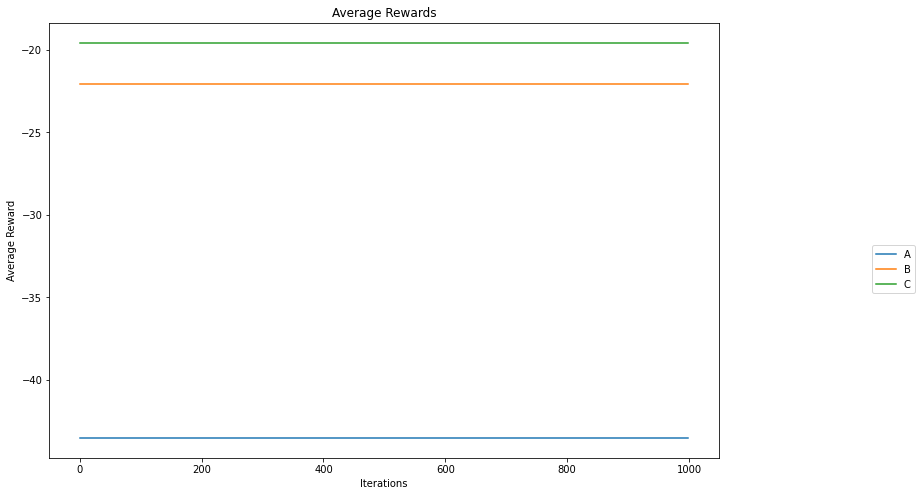

In [ ]:
iters = 1000
VA = np.zeros(iters)
VB = np.zeros(iters)
VC = np.zeros(iters)
for i in range(999):
  dir = random.choice([1,2])                              # A -> B/C?
  if dir == 1:                                            # A -> B
    prob = random.uniform(0,1)
    if prob <= PjAB:
      VA[i] = RjAB
    else:
      VA[i] = RnAB
    dir = random.choice([1,2])                            # B -> D1/D2?
    if dir == 1:                                          # B -> D1
      prob = random.uniform(0,1)
      if prob <= PjBD1:
        VB[i] = RjBD1
      else:
        VB[i] = RnBD1
    else:                                                 # B -> D2
      prob = random.uniform(0,1)
      if prob <= PjBD2:
        VB[i] = RjBD2
      else:
        VB[i] = RnBD2
 
  else:                                                   # A -> C
    prob = random.uniform(0,1)
    if prob <= PjAC:
      VA[i] = RjAC
    else:
      VA[i] = RnAC
    dir = random.choice([1,2])                            # C -> D1/D2?
    if dir == 1:                                          # C -> D1
      prob = random.uniform(0,1)
      if prob <= PjCD1:
        VC[i] = RjCD1
      else:
        VC[i] = RnCD1
    else:                                                 # C -> D2
      prob = random.uniform(0,1)
      if prob <= PjCD2:
        VC[i] = RjCD2
      else:
        VC[i] = RnCD2

plot_function(VA,VB,VC)

 Temporal differences

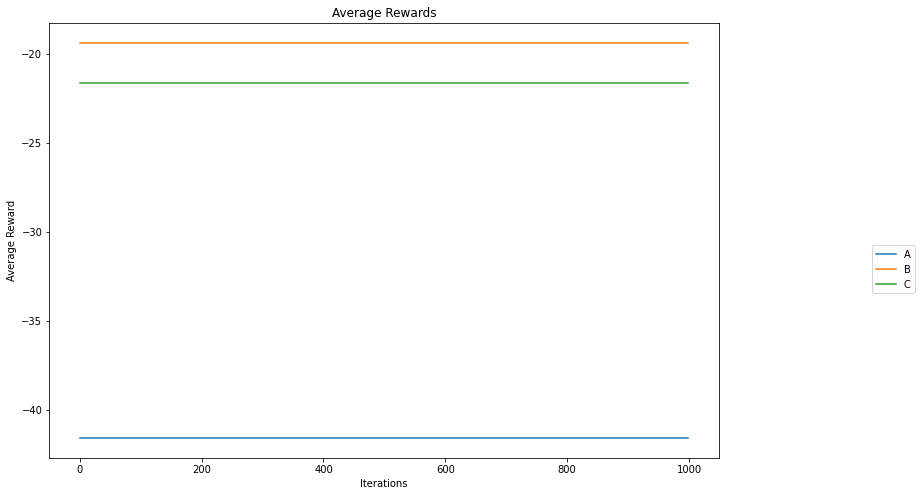

In [ ]:
iters = 1000
VA = np.random.rand(iters)
VB = np.random.rand(iters)
VC = np.random.rand(iters)
alfa = 1.0
gamma = 1.0
for i in range(999):
  dir = random.choice([1,2])                              # A -> B/C?
  if dir == 1:                                            # A -> B
    prob = random.uniform(0,1)
    if prob <= PjAB:
      VA[i] = VA[i]+alfa*(RjAB+gamma*VA[i+1]-VA[i])
    else:
      VA[i] = VA[i]+alfa*(RnAB+gamma*VA[i+1]-VA[i])
    dir = random.choice([1,2])                            # B -> D1/D2?
    if dir == 1:                                          # B -> D1
      prob = random.uniform(0,1)
      if prob <= PjBD1:
        VB[i] = VB[i]+alfa*(RjBD1+gamma*VB[i+1]-VB[i])
      else:
        VB[i] = VB[i]+alfa*(RnBD1+gamma*VB[i+1]-VB[i])
    else:                                                 # B -> D2
      prob = random.uniform(0,1)
      if prob <= PjBD2:
        VB[i] = VB[i]+alfa*(RjBD2+gamma*VB[i+1]-VB[i])
      else:
        VB[i] = VB[i]+alfa*(RnBD2+gamma*VB[i+1]-VB[i])
 
  else:                                                   # A -> C
    prob = random.uniform(0,1)
    if prob <= PjAC:
      VA[i] = VA[i]+alfa*(RjAC+gamma*VA[i+1]-VA[i])
    else:
      VA[i] = VA[i]+alfa*(RnAC+gamma*VA[i+1]-VA[i])
    dir = random.choice([1,2])                            # C -> D1/D2?
    if dir == 1:                                          # C -> D1
      prob = random.uniform(0,1)
      if prob <= PjCD1:
        VC[i] = VC[i]+alfa*(RjCD1+gamma*VC[i+1]-VC[i])
      else:
        VC[i] = VC[i]+alfa*(RnCD1+gamma+VC[i+1]-VC[i])
    else:                                                 # C -> D2
      prob = random.uniform(0,1)
      if prob <= PjCD2:
        VC[i] = VC[i]+alfa*(RjCD2+gamma*VC[i+1]-VC[i])
      else:
        VC[i] = VC[i]+alfa*(RnCD2+gamma*VC[i+1]-VC[1])

plot_function(VA,VB,VC)

Dynamic programming


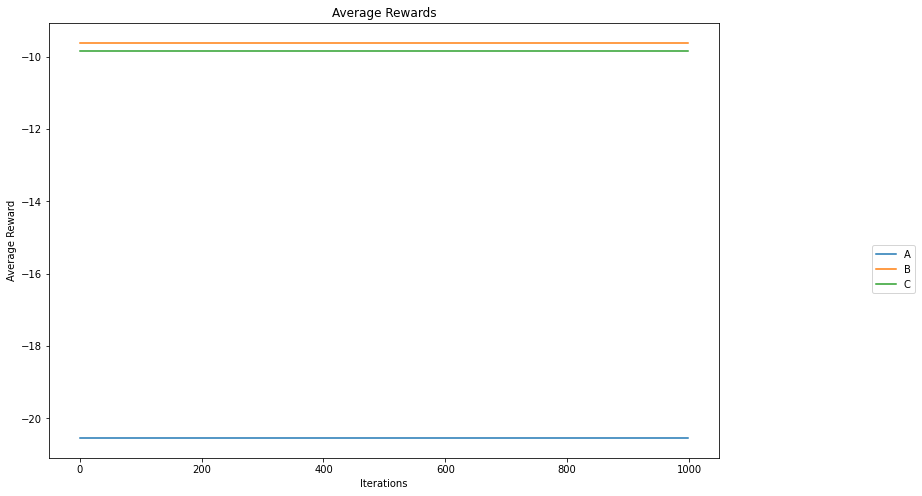

In [ ]:
iters = 1000
VA = np.random.rand(iters)
VB = np.random.rand(iters)
VC = np.random.rand(iters)
gamma = 0.9
Epi = 1*0.5
for i in range(999):
  dir = random.choice([1,2])            # A -> B/C?
  if dir == 1:                          # A -> B
    prob = random.uniform(0,1)
    if prob <= PjAB:
      VA[i] = Epi*(RjAB+gamma*VA[i+1])
    else:
      VA[i] = Epi*(RnAB+gamma*VA[i+1])
    dir = random.choice([1,2])         # B -> BD1/BD2
    if dir == 1:                       # B -> BD1
      prob = random.uniform(0,1)
      if prob <= PjBD1:
        VB[i] = Epi*(RjBD1+gamma*VB[i+1])
      else:
        VB[i] = Epi*(RnBD1+gamma*VB[i+1])
    else:                              # B -> BD2
      prob = random.uniform(0,1)
      if prob <= PjBD2:
        VB[i] = Epi*(RjBD2+gamma*VB[i+1])
      else:
        VB[i] = Epi*(RnBD2+gamma*VB[i+1])
      
  else:                                 # A -> C
    prob = random.uniform(0,1)
    if prob <= PjAC:
      VA[i] = Epi*(RjAC+gamma*VA[i+1])
    else:
      VA[i] = Epi*(RnAC+gamma*VA[i+1])
    dir = random.choice([1,2])          # C -> CD1/CD2
    if dir == 1:                        # C -> CD1
      prob = random.uniform(0,1)
      if prob <= PjCD1:
        VC[i] = Epi*(RjCD1+gamma*VC[i+1])
      else:
        VC[i] = Epi*(RnCD2+gamma*VC[i+1])
    else:
      prob = random.uniform(0,1)
      if prob <= PjCD2:
        VC[i] = Epi*(RjCD2+gamma*VC[i+1])
      else:
        VC[i] = Epi*(RnCD2+gamma*VC[i+1])

averA = np.zeros(iters)
for i, val in enumerate(VA):
  averA = averA + (val - averA)/(i+1)

averB = np.zeros(iters)
for i, val in enumerate(VB):
  averB = averB + (val - averB)/(i+1)

averC = np.zeros(iters)
for i, val in enumerate(VC):
  averC = averC + (val - averC)/(i+1)

plot_function(VA,VB,VC)

## Case 2

In [ ]:
PAB = 0.98
PAC = 0.88
PBD1 = 0.9
PBD2 = 0.79
PCD1 = 0.84
PCD2 = 0.94

PjAB = 0.54
PnAB = 1-PjAB 
RjAB = -52 
RnAB = -4

PjAC = 0.98 
PnAC = 1-PjAC
RjAC = -32 
RnAC = -14

PjBD1 = 0.54 
PnBD1 = 1-PjBD1
Rj = -41 
Rn = -18

PjBD2 = 0.1 
PnBD2 = 1-PjBD2
RjBD2 = -54 
RnBD2 = -25

PjCD1 = 0.19 
PnCD1 = 1-PjCD1
RjCD1 = -41 
RnCD1 = -16

PjCD2 = 0.75 
PnCD2 = 1-PjCD2
RjCD2 = -59 
RnCD2 = -10

Monte carlo

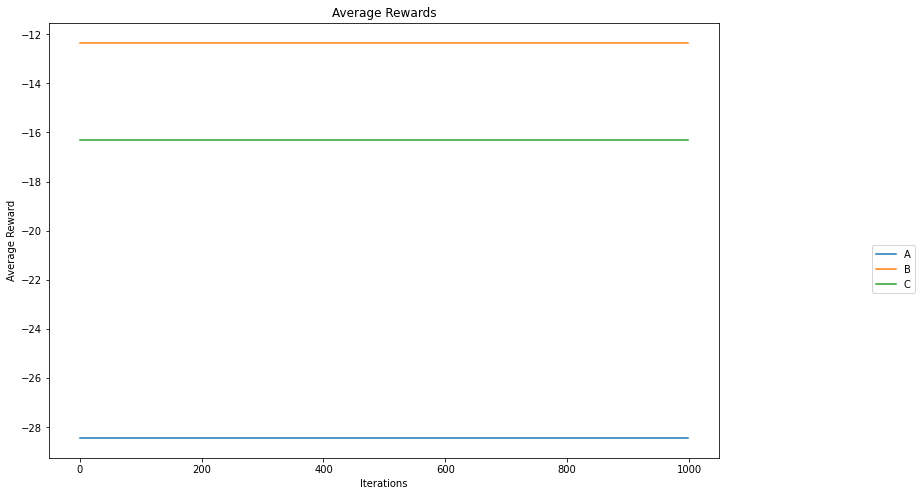

In [ ]:
iters = 1000
VA = np.zeros(iters)
VB = np.zeros(iters)
VC = np.zeros(iters)
for i in range(999):
  dir = random.choice([1,2])                              # A -> B/C?
  if dir == 1:                                            # A -> B
    prob = random.uniform(0,1)
    if prob <= PjAB:
      VA[i] = PAB*RjAB
    else:
      VA[i] = PAB*RnAB
    dir = random.choice([1,2])                            # B -> D1/D2?
    if dir == 1:                                          # B -> D1
      prob = random.uniform(0,1)
      if prob <= PjBD1:
        VB[i] = PBD1*RjBD1
      else:
        VB[i] = PBD1*RnBD1
    else:                                                 # B -> D2
      prob = random.uniform(0,1)
      if prob <= PjBD2:
        VB[i] = PBD2*RjBD2
      else:
        VB[i] = PBD2*RnBD2
 
  else:                                                   # A -> C
    prob = random.uniform(0,1)
    if prob <= PjAC:
      VA[i] = PAC*RjAC
    else:
      VA[i] = PAC*RnAC
    dir = random.choice([1,2])                            # C -> D1/D2?
    if dir == 1:                                          # C -> D1
      prob = random.uniform(0,1)
      if prob <= PjCD1:
        VC[i] = PCD1*RjCD1
      else:
        VC[i] = PCD1*RnCD1
    else:                                                 # C -> D2
      prob = random.uniform(0,1)
      if prob <= PjCD2:
        VC[i] = PCD2*RjCD2
      else:
        VC[i] = PCD2*RnCD2

plot_function(VA,VB,VC)

Temporal differences

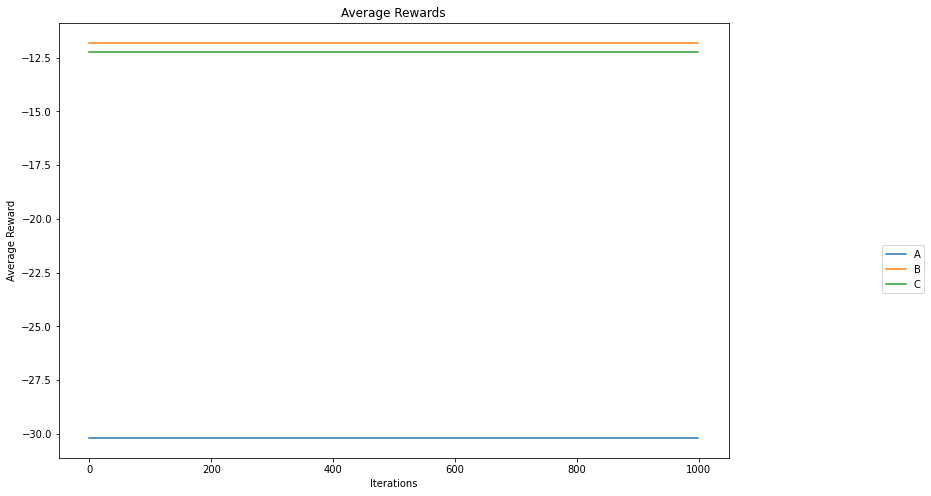

In [ ]:
iters = 1000
VA = np.random.rand(iters)
VB = np.random.rand(iters)
VC = np.random.rand(iters)
alfa = 1.0
gamma = 1.0
for i in range(999):
  dir = random.choice([1,2])                              # A -> B/C?
  if dir == 1:                                            # A -> B
    prob = random.uniform(0,1)
    if prob <= PjAB:
      VA[i] = PAB*(VA[i]+alfa*(RjAB+gamma*VA[i+1]-VA[i]))
    else:
      VA[i] = PAB*(VA[i]+alfa*(RnAB+gamma*VA[i+1]-VA[i]))
    dir = random.choice([1,2])                            # B -> D1/D2?
    if dir == 1:                                          # B -> D1
      prob = random.uniform(0,1)
      if prob <= PjBD1:
        VB[i] = PBD1*(VB[i]+alfa*(RjBD1+gamma*VB[i+1]-VB[i]))
      else:
        VB[i] = PBD1*(VB[i]+alfa*(RnBD1+gamma*VB[i+1]-VB[i]))
    else:                                                 # B -> D2
      prob = random.uniform(0,1)
      if prob <= PjBD2:
        VB[i] = PBD2*(VB[i]+alfa*(RjBD2+gamma*VB[i+1]-VB[i]))
      else:
        VB[i] = PBD2*(VB[i]+alfa*(RnBD2+gamma*VB[i+1]-VB[i]))
 
  else:                                                   # A -> C
    prob = random.uniform(0,1)
    if prob <= PjAC:
      VA[i] = PAB*(VA[i]+alfa*(RjAC+gamma*VA[i+1]-VA[i]))
    else:
      VA[i] = PAB*(VA[i]+alfa*(RnAC+gamma*VA[i+1]-VA[i]))
    dir = random.choice([1,2])                            # C -> D1/D2?
    if dir == 1:                                          # C -> D1
      prob = random.uniform(0,1)
      if prob <= PjCD1:
        VC[i] = PCD1*(VC[i]+alfa*(RjCD1+gamma*VC[i+1]-VC[i]))
      else:
        VC[i] = PCD1*(VC[i]+alfa*(RnCD1+gamma+VC[i+1]-VC[i]))
    else:                                                 # C -> D2
      prob = random.uniform(0,1)
      if prob <= PjCD2:
        VC[i] = PCD2*(VC[i]+alfa*(RjCD2+gamma*VC[i+1]-VC[i]))
      else:
        VC[i] = PCD2*(VC[i]+alfa*(RnCD2+gamma*VC[i+1]-VC[1]))

plot_function(VA,VB,VC)

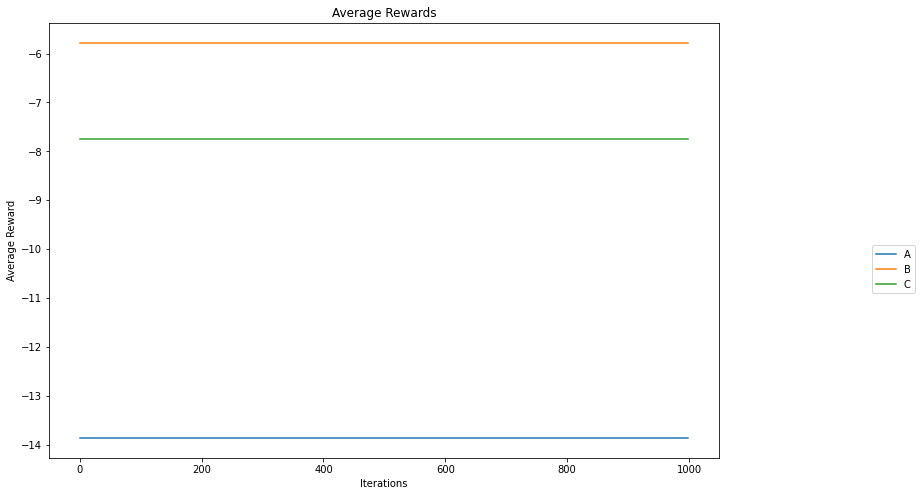

In [ ]:
iters = 1000
VA = np.random.rand(iters)
VB = np.random.rand(iters)
VC = np.random.rand(iters)
gamma = 0.9
EpiAB = PAB*0.5
EpiBD1 = PBD1*0.5
EpiBD2 = PBD2*0.5
EpiAC = PAC*0.5
EpiCD1 = PAB*0.5
EpiCD2 = PAB*0.5
for i in range(999):
  dir = random.choice([1,2])            # A -> B/C?
  if dir == 1:                          # A -> B
    prob = random.uniform(0,1)
    if prob <= PjAB:
      VA[i] = EpiAB*(RjAB+gamma*VA[i+1])
    else:
      VA[i] = EpiAB*(RnAB+gamma*VA[i+1])
    dir = random.choice([1,2])         # B -> BD1/BD2
    if dir == 1:                       # B -> BD1
      prob = random.uniform(0,1)
      if prob <= PjBD1:
        VB[i] = EpiBD1*(RjBD1+gamma*VB[i+1])
      else:
        VB[i] = EpiBD1*(RnBD1+gamma*VB[i+1])
    else:                              # B -> BD2
      prob = random.uniform(0,1)
      if prob <= PjBD2:
        VB[i] = EpiBD2*(RjBD2+gamma*VB[i+1])
      else:
        VB[i] = EpiBD2*(RnBD2+gamma*VB[i+1])
      
  else:                                 # A -> C
    prob = random.uniform(0,1)
    if prob <= PjAC:
      VA[i] = EpiAC*(RjAC+gamma*VA[i+1])
    else:
      VA[i] = EpiAC*(RnAC+gamma*VA[i+1])
    dir = random.choice([1,2])          # C -> CD1/CD2
    if dir == 1:                        # C -> CD1
      prob = random.uniform(0,1)
      if prob <= PjCD1:
        VC[i] = EpiCD1*(RjCD1+gamma*VC[i+1])
      else:
        VC[i] = EpiCD1*(RnCD2+gamma*VC[i+1])
    else:
      prob = random.uniform(0,1)
      if prob <= PjCD2:
        VC[i] = EpiCD2*(RjCD2+gamma*VC[i+1])
      else:
        VC[i] = EpiCD2*(RnCD2+gamma*VC[i+1])

averA = np.zeros(iters)
for i, val in enumerate(VA):
  averA = averA + (val - averA)/(i+1)

averB = np.zeros(iters)
for i, val in enumerate(VB):
  averB = averB + (val - averB)/(i+1)

averC = np.zeros(iters)
for i, val in enumerate(VC):
  averC = averC + (val - averC)/(i+1)

plot_function(VA,VB,VC)

All of algorithms have different performance because they all do searching and storing results in a different way.
For these cases the Monte Carlo was the fastest and powerful one because it doesn't know the probability of actions and states, it learns from experience by averaging the rewards after running the episodes.
Temporal differences uses single step learning and corrects model, based on current step. The Dynamic Programming is quite similar to TD but it knows the expected probability.
MC and TD are showing quite the similar results, but in the Case 2 we can see that model - based algorithms are permorming better than non-model based MC: the results of TD and DP are more close to 0 than MC, this is because in this case we had the derouting probability.